# IDS-2017 multiclass classification using NetTiSA flows

In [27]:
import pandas as pd
import numpy as np
import json
import collections

import warnings
warnings.filterwarnings('ignore')

from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

import seaborn as sns

#Import Random Forest Model
from sklearn.ensemble import RandomForestClassifier
#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics

from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import KFold
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import AdaBoostClassifier
from sklearn.svm import SVC
import lightgbm as lgb
#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics

from sklearn.model_selection import train_test_split

from xgboost import XGBClassifier


from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from collections import Counter
from imblearn.over_sampling import RandomOverSampler, SMOTE
from imblearn.under_sampling import RandomUnderSampler, NearMiss


In [28]:
df = pd.read_csv("../final_datasets/ids_cic_multiclass.csv")

In [29]:
df

,Unnamed: 0,SRC_IP,DST_IP,SRC_PORT,DST_PORT,TIME_FIRST,TIME_LAST,LABEL,PACKETS,PACKETS_REV,BYTES,BYTES_REV,MEAN,STDEV,VAR,BURSTINESS,MIN,MAX,MIN_MINUS_MAX,COEFFICIENT_OF_VARIATION,AVERAGE_DISPERSION,PERCENT_DEVIATION,ROOT_MEAN_SQUARE,KURTOSIS,TIME_DISTRIBUTION,MEAN_RELATIVE_TIME,DURATION,MEAN_DIFFTIMES,MIN_DIFFTIMES,MAX_DIFFTIMES,SWITCHING_METRIC,DIRECTIONS
0,0,fe80::6d07:ea13:6f73:ed41,ff02::1:2,546,547,1.499429e+09,1.499429e+09,BENIGN,20,0,2060,0,163,0.000000,0,-1.000000,163,163,0,0.000000,0,0.000000,163.000000,0.000000,0.550000,17.606277,32.011410,1.684811,9.536743e-07,32.011359,0.000000,1.0
1,1,192.168.10.25,192.168.10.255,138,138,1.499429e+09,1.499429e+09,BENIGN,36,0,7776,0,276,0.000000,0,-1.000000,276,276,0,0.000000,0,0.000000,276.000000,0.000000,0.666240,20.248109,30.391613,0.868332,9.536743e-07,30.352596,0.000000,1.0
2,2,192.168.10.14,13.78.188.147,49442,443,1.499429e+09,1.499429e+09,BENIGN,15,0,7118,0,534,406.987715,165640,-0.134978,60,945,885,76.214928,386,72.284644,663.568334,0.980343,0.421537,0.412525,0.978622,0.069902,7.050037e-04,0.124533,1.714286,1.0
3,3,13.78.188.147,192.168.10.14,443,49442,1.499429e+09,1.499429e+09,BENIGN,13,0,5852,0,510,482.231272,232547,-0.027986,60,1520,1460,94.555151,362,70.980392,689.141383,3.076312,0.430102,0.369769,0.859725,0.071644,4.816055e-05,0.154162,1.333333,1.0
4,4,192.168.10.14,65.152.202.208,49435,80,1.499429e+09,1.499429e+09,BENIGN,4,0,287,0,131,143.499129,20593,0.045534,60,347,287,109.541320,107,81.679389,181.113914,1.328335,0.399578,0.053222,0.133196,0.044399,8.893013e-05,0.093305,1.333333,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2189497,2189497,192.168.10.16,54.239.27.131,39462,443,1.499285e+09,1.499285e+09,BENIGN,10,0,361,0,96,71.035203,5046,-0.149458,60,264,204,73.995003,51,53.125000,117.376744,3.432402,0.310055,1.797256,5.796573,0.644064,2.002716e-05,5.530482,1.333333,1.0
2189498,2189498,54.239.27.131,192.168.10.16,443,39460,1.499285e+09,1.499285e+09,BENIGN,18,0,4153,0,290,486.092584,236287,0.252666,60,1520,1460,167.618132,349,120.344828,554.688451,4.653261,0.349754,22.826011,65.263079,3.839005,3.099442e-06,10.240159,0.941176,1.0
2189499,2189499,54.239.27.131,192.168.10.16,443,39462,1.499285e+09,1.499285e+09,BENIGN,8,0,3395,0,484,655.179365,429260,0.150266,60,1520,1460,135.367637,517,106.818182,781.167156,1.663755,0.134493,0.772732,5.745534,0.820791,4.816055e-05,5.622555,1.142857,1.0
2189500,2189500,192.168.10.16,52.201.108.198,54364,443,1.499285e+09,1.499285e+09,BENIGN,12,0,861,0,131,161.588985,26111,0.104546,60,605,545,123.350370,107,81.679389,203.207816,6.223583,0.288032,0.475818,1.651963,0.150178,4.792213e-05,1.434194,0.909091,1.0


In [30]:
default_faetures = [
    "PACKETS",
    "PACKETS_REV",
    "BYTES",
    "BYTES_REV",
]

features = [
    "PACKETS",
    "PACKETS_REV",
    "BYTES",
    "BYTES_REV",
    "MEAN",
    "STDEV",
    "VAR",
    "BURSTINESS",
    "MIN",
    "MAX",
    "MIN_MINUS_MAX",
    "COEFFICIENT_OF_VARIATION",
    "AVERAGE_DISPERSION",
    "PERCENT_DEVIATION",
    "ROOT_MEAN_SQUARE",
    "KURTOSIS",
    "TIME_DISTRIBUTION",
    "MEAN_RELATIVE_TIME",
    "DURATION",
    "MEAN_DIFFTIMES",
    "MIN_DIFFTIMES",
    "MAX_DIFFTIMES",
    "SWITCHING_METRIC",
    "DIRECTIONS",
]

In [31]:
import sklearn
pd.set_option('display.max_columns', None)

df = df[["LABEL"] + features].copy()

for F in features:
    df.replace([np.inf], 0, inplace=True)
    df.replace([-np.inf], 0, inplace=True)
    df.loc[df[F].isnull(), F] = 0

In [32]:
def clean_dataset(df):
    assert isinstance(df, pd.DataFrame), "df needs to be a pd.DataFrame"
    df.dropna(inplace=True)
    indices_to_keep = ~df.isin([np.nan, np.inf, -np.inf]).any(1)
    for f in features:
        df[f] = df[f][indices_to_keep].astype(np.float64)
    return df

df = clean_dataset(df)

In [33]:
df.shape

(2189502, 25)

In [34]:
df.LABEL.mask(df.LABEL == "DDoS", "DoS", inplace=True)
df.LABEL.mask(df.LABEL == "DoS GoldenEye", "DoS", inplace=True)
df.LABEL.mask(df.LABEL == "DoS Hulk", "DoS", inplace=True)
df.LABEL.mask(df.LABEL == "DoS Slowhttptest", "DoS", inplace=True)
df.LABEL.mask(df.LABEL == "DoS slowloris", "DoS", inplace=True)
df.LABEL.mask(df.LABEL == "Web Attack – Brute Force", "Web Attack", inplace=True)
df.LABEL.mask(df.LABEL == "Web Attack – Sql Injection", "Web Attack", inplace=True)
df.LABEL.mask(df.LABEL == "Web Attack – XSS", "Web Attack", inplace=True)

df['LABEL'] = df.LABEL.astype('category')
df["LABEL_code"] = df["LABEL"].cat.codes

In [35]:
df[["LABEL", "LABEL_code"]].drop_duplicates().sort_values("LABEL_code")

,LABEL,LABEL_code
0,BENIGN,0
18956,Bot,1
28889,DoS,2
1213659,FTP-Patator,3
1852683,Heartbleed,4
920929,Infiltration,5
21901,PortScan,6
1238850,SSH-Patator,7
906977,Web Attack,8


In [46]:
classifications_array = []
for index, row in df[["LABEL", "LABEL_code"]].drop_duplicates().sort_values("LABEL_code").iterrows():
    classifications_array.append(row[0])
classifications_array

['BENIGN',
 'Bot',
 'DDoS',
 'FTP-Patator',
 'Heartbleed',
 'Infiltration',
 'PortScan',
 'SSH-Patator',
 'Web Attack']

In [47]:
df = df[["LABEL_code"] + features].copy()

In [48]:
df.LABEL_code.value_counts()

0    1699049
2     470075
3       7982
7       5960
1       2470
8       2301
6       1611
5         44
4         10
Name: LABEL_code, dtype: int64

In [69]:
df_validation = df.sample(n = 200000)
df_features =  df[~df.isin(df_validation)].dropna()

In [70]:
df_features.shape[0]*0.7

1392651.4

In [71]:
df_features.LABEL_code.value_counts()

0.0    1543836
2.0     427233
3.0       7234
7.0       5395
1.0       2198
8.0       2096
6.0       1464
5.0         38
4.0          8
Name: LABEL_code, dtype: int64

In [72]:
df_validation.LABEL_code.value_counts()

0    155213
2     42842
3       748
7       565
1       272
8       205
6       147
5         6
4         2
Name: LABEL_code, dtype: int64

In [53]:
def get_confusion_matrix(y_test, y_pred):
    # Get and reshape confusion matrix data
    matrix = confusion_matrix(y_test, y_pred)
    percentage_matrix = matrix.astype('float') / matrix.sum(axis=1)[:, np.newaxis]
    return matrix, percentage_matrix

def plot_confusion_matrix(matrix, percentage_matrix, model=""):
    # Build the plot
    fig, ax = plt.subplots(1, 2,figsize=(15,5))
    sns.set(font_scale=1.4)
    sns.heatmap(matrix, annot=True, annot_kws={'size':10}, fmt='g',
                cmap=plt.cm.Greens, linewidths=0.2, ax=ax[0])
    sns.heatmap(percentage_matrix, annot=True, annot_kws={'size':10}, fmt='g',
                cmap=plt.cm.Greens, linewidths=0.2, ax=ax[1])
    # Add labels to the plot
    plt.tick_params(axis='both', which='minor', labelsize=5)
    # tick_marks = np.arange(len(classifications_array)) + 0.5
    # plt.xticks(tick_marks, classifications_array, rotation=85)
    # plt.yticks(tick_marks, classifications_array, rotation=0)
    ax[0].set_xlabel('Predicted label')
    ax[0].set_ylabel('True label')
    ax[0].set_title(f'Absolute Confusion Matrix for {model}')
    ax[1].set_xlabel('Predicted label')
    ax[1].set_ylabel('True label')
    ax[1].set_title(f'Relative Confusion Matrix for {model}')
    # pyplot.savefig("ddos_timeseries_plugin_classification.eps", format="eps")
    plt.show()

In [54]:
X = df_features[features]
y = df_features.LABEL_code
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify=y)

In [55]:
y_train.value_counts()

0.0    1135005
2.0     314012
3.0       5333
7.0       3982
1.0       1664
8.0       1538
6.0       1081
5.0         29
4.0          7
Name: LABEL_code, dtype: int64

In [56]:
y_test.value_counts()

0.0    486431
2.0    134576
3.0      2285
7.0      1707
1.0       713
8.0       659
6.0       464
5.0        13
4.0         3
Name: LABEL_code, dtype: int64

In [57]:
from hyperopt import STATUS_OK, Trials, fmin, hp, tpe
from sklearn.metrics import mean_absolute_error

def tunne_together_XGBoost_classification(df_tunne, _features, verbose=True):
    X=df_tunne[_features]  # Features
    y=df_tunne['LABEL_code']  # Labels
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0, stratify=y)
    
    def objective(space):
        clf = XGBClassifier(
                        n_estimators = int(space['n_estimators']), max_depth = int(space['max_depth']), gamma = space['gamma'],
                        reg_alpha = int(space['reg_alpha']),min_child_weight=int(space['min_child_weight']),
                        colsample_bytree=int(space['colsample_bytree']), 
                        # subsample=int(space['subsample']),
                        # eta=space['eta'],
                            )

        evaluation = [( X_train, y_train), ( X_test, y_test)]

        clf.fit(X_train, y_train,
                eval_set=evaluation, eval_metric="auc",
                early_stopping_rounds=10,verbose=False)

        pred = clf.predict(X_test)
        # accuracy = mean_absolute_error(y_test, pred)
        # accuracy = accuracy_score(y_test, pred)
        accuracy = f1_score(y_test, pred,average='weighted')
        if verbose is True:
            print ("SCORE:", accuracy, "  ", space)
        return {'loss': -accuracy, 'status': STATUS_OK }
    
    space={'max_depth': hp.quniform("max_depth", 10, 40, 5),
        'gamma': hp.uniform ('gamma', 1,4),
        'reg_alpha' : hp.quniform('reg_alpha', 0,90,5),
        'reg_lambda' : hp.uniform('reg_lambda', 0,1),
        'colsample_bytree' : hp.uniform('colsample_bytree', 0, 1),
        'min_child_weight' : hp.quniform('min_child_weight', 0, 20, 3),
        'n_estimators': hp.quniform('n_estimators', 50, 400, 50),
        # 'subsample': hp.quniform('subsample', 3, 20, 1),
        # 'eta': hp.quniform('eta', 0.005, 0.3, 0.005),
        'seed': 0
    }
    
    trials = Trials()
    
    best_hyperparams = fmin(fn = objective,
                        space = space,
                        algo = tpe.suggest,
                        max_evals = 100,
                        trials = trials)
        
    print("The best hyperparameters are : ","\n")
    print(best_hyperparams)
    return best_hyperparams

In [58]:
best_hyperparams = tunne_together_XGBoost_classification(df_features.sample(200000), features, verbose=False)

100%|██████████| 100/100 [1:21:15<00:00, 48.75s/trial, best loss: -0.9962962077241877]
The best hyperparameters are :  

{'colsample_bytree': 0.7529254160698279, 'gamma': 1.5584113648238225, 'max_depth': 15.0, 'min_child_weight': 0.0, 'n_estimators': 350.0, 'reg_alpha': 0.0, 'reg_lambda': 0.8908354726163623}


In [59]:
def XGBoost_classification_tunned_old(best_hyperparams, X_train=None, X_test=None, y_train=None, y_test=None):
      if X_train is None:
            X=df_features[features]  # Features
            y=df_features['LABEL_code']  # Labels
            #Split on train and test
            X_train_a, X_test_a, y_train, y_test = train_test_split(X, y, test_size=0.30, stratify=y) # 70% training and 30% test
            X_train = X_train_a[features]
            X_test = X_test_a[features] 
      
      model = XGBClassifier(
            n_estimators = int(best_hyperparams['n_estimators']), max_depth = int(best_hyperparams['max_depth']), gamma = best_hyperparams['gamma'],
            reg_alpha = int(best_hyperparams['reg_alpha']),min_child_weight=int(best_hyperparams['min_child_weight']),
            colsample_bytree=int(best_hyperparams['colsample_bytree']),
            # subsample=int(best_hyperparams['subsample']),
            # eta=best_hyperparams['eta'],
      )
      model.fit(X_train, y_train)
      y_pred = model.predict(X_test)
      
      print(classification_report(y_test, y_pred,  digits=4))  # target_names=classifications_array,
      matrix, percentage_matrix = get_confusion_matrix(y_test, y_pred)
      plot_confusion_matrix(matrix, percentage_matrix, model="XGBoost")
      return model

              precision    recall  f1-score   support

         0.0     0.9988    0.9990    0.9989    486431
         1.0     0.8446    0.7013    0.7663       713
         2.0     0.9956    0.9981    0.9968    134576
         3.0     1.0000    0.9965    0.9982      2285
         4.0     1.0000    0.6667    0.8000         3
         5.0     0.0000    0.0000    0.0000        13
         6.0     0.9655    0.4828    0.6437       464
         7.0     0.9994    0.9865    0.9929      1707
         8.0     0.9951    0.9241    0.9583       659

    accuracy                         0.9980    626851
   macro avg     0.8666    0.7506    0.7950    626851
weighted avg     0.9979    0.9980    0.9979    626851



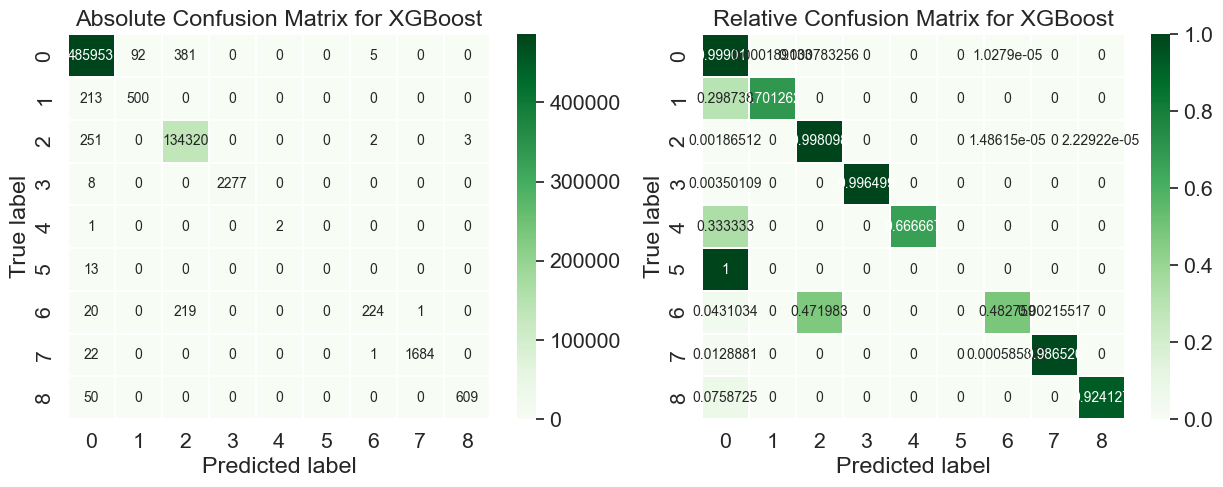

In [60]:
model = XGBoost_classification_tunned_old(best_hyperparams, X_train, X_test, y_train, y_test)

In [61]:

def while_XGBoost_classification_tunned_old(best_hyperparams, cycles=100):
    X=df_features[features]  # Features
    y=df_features['LABEL_code']  # Labels
    best = 0
    best_model = None
    report = None
    i = 0
    print(f"\r{i}", end="")
    for i in range(cycles):
        print(f"\r{i}", end="", flush=True)
        tmp_f1 = 0
        tmp_str = ""
        #Split on train and test
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify=y) # 70% training and 30% test
        # sm = SMOTE(random_state=100)
        # X_train, y_train = sm.fit_resample(X_train, y_train)
        # X_test, y_test = sm.fit_resample(X_test, y_test)
        
        model = XGBClassifier(
            n_estimators = int(best_hyperparams['n_estimators']), max_depth = int(best_hyperparams['max_depth']), gamma = best_hyperparams['gamma'],
            reg_alpha = int(best_hyperparams['reg_alpha']),min_child_weight=int(best_hyperparams['min_child_weight']),
            colsample_bytree=int(best_hyperparams['colsample_bytree']),
            # subsample=int(best_hyperparams['subsample']),
            # eta=best_hyperparams['eta'],
        )
        model.fit(X_train, y_train, ) # eval_set=evaluation, eval_metric=["auc","error","logloss"], verbose=False
        y_pred = model.predict(X_test)
        
        F1 = f1_score(y_test, y_pred, average='macro')
        if F1 > best:   
            best = F1
            best_model = model
            report = classification_report(y_test, y_pred, target_names=classifications_array, digits=4)
        
    print("")
    print(report)
    return best_model

In [62]:
best_model = while_XGBoost_classification_tunned_old(best_hyperparams, cycles=25)

24
              precision    recall  f1-score   support

      BENIGN     0.9988    0.9991    0.9990    486431
         Bot     0.8628    0.6971    0.7711       713
        DDoS     0.9958    0.9981    0.9969    134576
 FTP-Patator     0.9991    0.9991    0.9991      2285
  Heartbleed     1.0000    0.6667    0.8000         3
Infiltration     1.0000    0.2308    0.3750        13
    PortScan     0.9644    0.5259    0.6806       464
 SSH-Patator     1.0000    0.9924    0.9962      1707
  Web Attack     0.9967    0.9226    0.9582       659

    accuracy                         0.9980    626851
   macro avg     0.9798    0.7813    0.8418    626851
weighted avg     0.9980    0.9980    0.9980    626851



In [73]:
X_validation=df_validation[features]  # Features
y_validation=df_validation['LABEL_code']  # Labels

              precision    recall  f1-score   support

      BENIGN     0.9992    0.9994    0.9993    155213
         Bot     0.9485    0.8125    0.8752       272
        DDoS     0.9965    0.9989    0.9977     42842
 FTP-Patator     0.9987    0.9987    0.9987       748
  Heartbleed     1.0000    0.5000    0.6667         2
Infiltration     1.0000    0.6667    0.8000         6
    PortScan     0.9747    0.5238    0.6814       147
 SSH-Patator     1.0000    0.9982    0.9991       565
  Web Attack     0.9948    0.9366    0.9648       205

    accuracy                         0.9986    200000
   macro avg     0.9903    0.8261    0.8870    200000
weighted avg     0.9985    0.9986    0.9985    200000



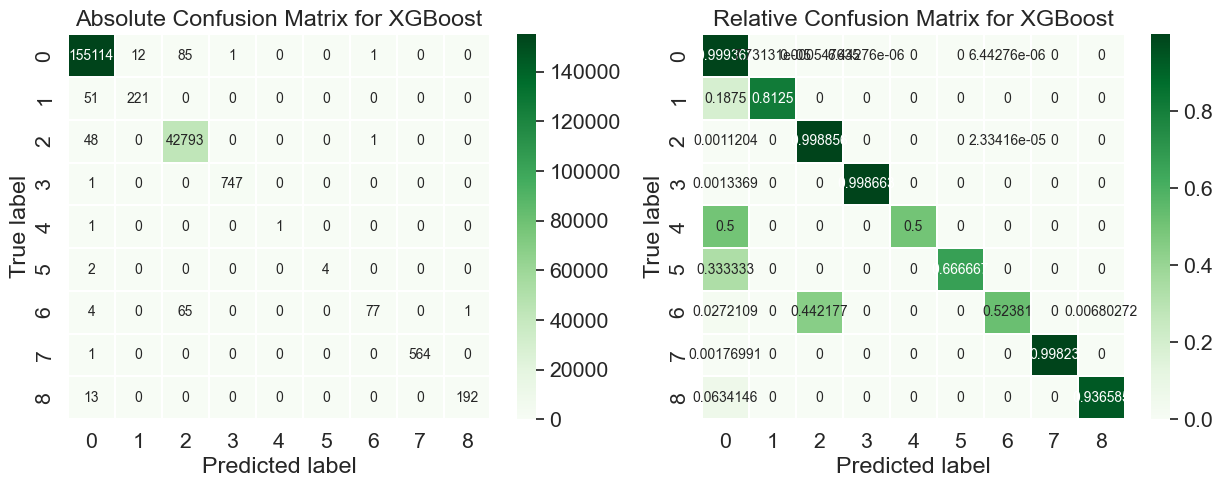

In [74]:
y_pred = best_model.predict(X_validation)

print(classification_report(y_validation, y_pred, target_names=classifications_array,digits=4))  # 

matrix, percentage_matrix = get_confusion_matrix(y_validation, y_pred)
plot_confusion_matrix(matrix, percentage_matrix, model="XGBoost")

# Feature importance

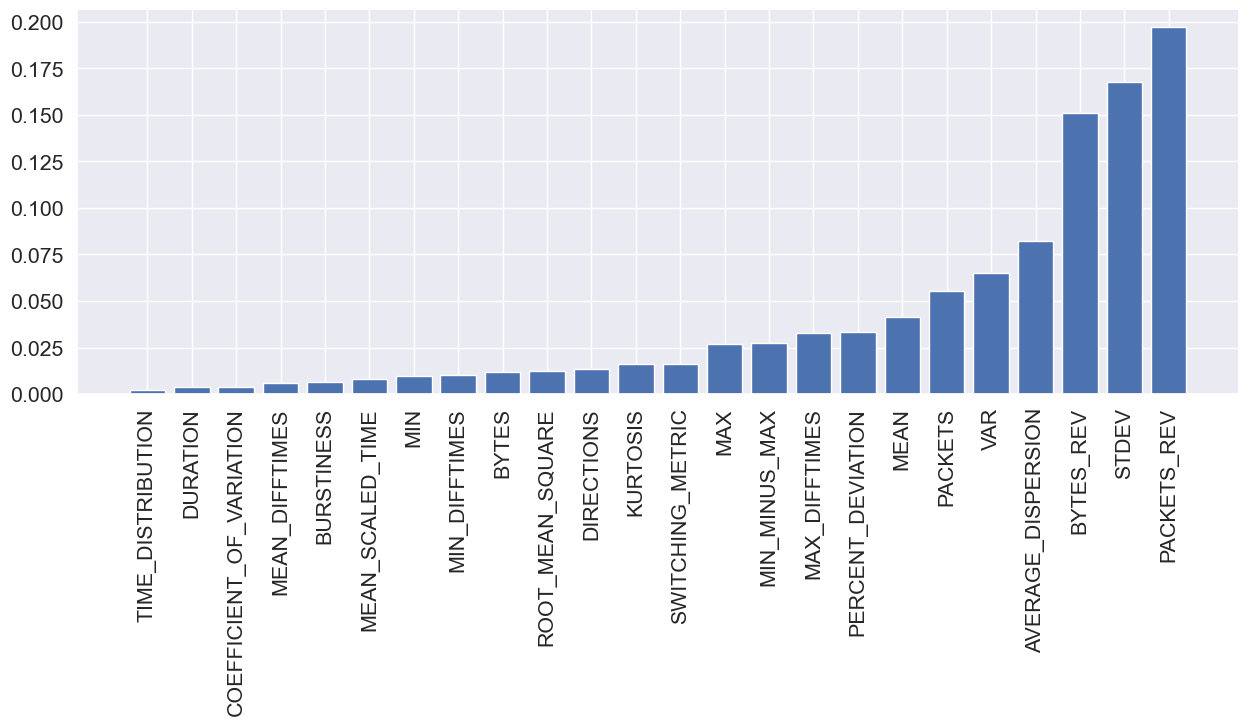

In [75]:
feat_importances = pd.Series(best_model.feature_importances_, index = X_validation.columns).sort_values(ascending = True)
fig, ax = plt.subplots(figsize=(15,5))
ax.bar(feat_importances.keys(), feat_importances.values)
plt.xticks(rotation = 90)
plt.show()

In [76]:
feat_importances.to_dict()

{'TIME_DISTRIBUTION': 0.0020952720660716295,
 'DURATION': 0.0037413642276078463,
 'COEFFICIENT_OF_VARIATION': 0.0038424876984208822,
 'MEAN_DIFFTIMES': 0.005918417125940323,
 'BURSTINESS': 0.006489712279289961,
 'MEAN_SCALED_TIME': 0.007986078038811684,
 'MIN': 0.009733188897371292,
 'MIN_DIFFTIMES': 0.010379203595221043,
 'BYTES': 0.012016402557492256,
 'ROOT_MEAN_SQUARE': 0.012650414370000362,
 'DIRECTIONS': 0.013375980779528618,
 'KURTOSIS': 0.0159008651971817,
 'SWITCHING_METRIC': 0.01609780453145504,
 'MAX': 0.02668272703886032,
 'MIN_MINUS_MAX': 0.027266236022114754,
 'MAX_DIFFTIMES': 0.03272087499499321,
 'PERCENT_DEVIATION': 0.03314196318387985,
 'MEAN': 0.041447415947914124,
 'PACKETS': 0.05549756437540054,
 'VAR': 0.06506570428609848,
 'AVERAGE_DISPERSION': 0.0824287012219429,
 'BYTES_REV': 0.15087123215198517,
 'STDEV': 0.16765351593494415,
 'PACKETS_REV': 0.19699682295322418}